# Generating the Mandelbrot set with Python

In this little Jupyter notebook, we implement a simple algorithm for generating the Mandelbrot set.

### Load some libraries

The libraries we need are all included with Anaconda.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from time import time # It's nice to know how fast our code runs
from numba import jit # Just in time compilation

### Define the function of interest and set some parameters

In [2]:
@jit(nopython=True)
def f(c,z): return z**2 + c

cmin = -2-1.3j
cmax = 0.6+1.3j
max_iters = 150
escape_radius_squared = 4
resolution = 800

### Everything else should be good to run

In [3]:
@jit(nopython=True)
def critical_orbit_cnt(c, max_iters, escape_radius_squared):
    z = 1
    cnt = 0
    while cnt < max_iters and z.real**2 + z.imag**2 <= escape_radius_squared:
        cnt = cnt + 1
        z = f(c,z)
    return cnt

@jit(nopython=True)
def generate_critical_counts(cmin,cmax, max_iters, escape_radius_squared, resolution):
    xs = [cmin.real, cmax.real]
    xs.sort()
    xmin,xmax = xs
    ys = [cmin.imag, cmax.imag]
    ys.sort()
    ymin,ymax = ys
    xrange = xmax-xmin
    yrange = ymax-ymin
    if xrange >= yrange:
        xdim = int(resolution)
        ydim = int(xdim*(yrange/xrange))
        delta = xrange/xdim
    else:
        ydim = int(resolution)
        xdim = int(ydim*(xrange/yrange))
        delta = yrange/resolution

    counts = np.zeros((ydim,xdim))
    for i in range(ydim):
        for j in range(xdim):
            c = complex(xmin + j*delta, ymin + i*delta)
            count = critical_orbit_cnt(c, max_iters, escape_radius_squared)
            if count < max_iters:
                counts[i,j] = count
    return counts

# Precompile
nocolors = generate_critical_counts(-1-1j,1+1j,2,2,2)

In [4]:
# Generate the colors and time how long that takes
t = time()
counts = generate_critical_counts(cmin,cmax, max_iters, escape_radius_squared, resolution)
time() - t

0.059686899185180664

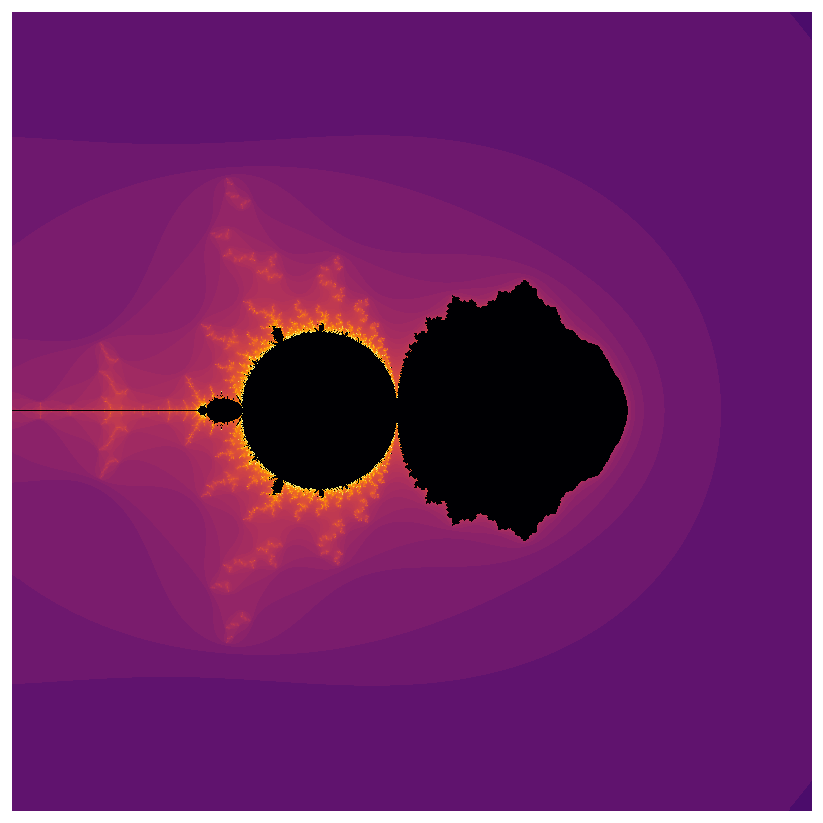

In [5]:
# Make the picture!

ydim,xdim = counts.shape[:2]
fig = plt.figure(figsize=(xdim/80,ydim/80), dpi=80)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.set_xlim(0,xdim)
ax.set_ylim(0,ydim)
ax.set_yticks([])
ax.set_xticks([])

plt.imshow(counts**0.3, zorder=1, cmap="inferno")
#plt.plot([0,xdim, xdim,0,0], [0, 0, ydim, ydim, 0], 'k')
#ax = plt.gca()
#ax.set_xlim(0,xdim)
#ax.set_ylim(0,ydim)
#ax.set_yticks([0,ydim/2,ydim])
#ax.set_yticklabels([cmin.imag, (cmax.imag+cmin.imag)/2, cmax.imag])
#ax.set_xticks([0,xdim/2,xdim])
#supress = ax.set_xticklabels([cmin.real, (cmax.real+cmin.real)/2, cmax.real])

#fig = plt.gcf()
#fig.set_figheight(12)
#fig.set_figwidth(12)

# Uncomment this, if you want to save the image to a file.
# plt.savefig('mandlebrot_set_hr.png', pad_inches=0, dpi=fig.dpi)

If you'd like to highlight some feature in the set, you'll probably need a function to scale the complex coordinates to the image coordinates. The `scaler` function below automates this.

In [ ]:
def scaler(domain_min, domain_max, range_min, range_max):
    def scale(x):
        return (-domain_min*range_max + domain_max*range_min + \
            (range_max - range_min)*x)/(domain_max - domain_min)
    return scale

For example, here's how to place a dot at the origin and outline the main cardioid.

In [ ]:


plt.imshow(counts**0.1, zorder=1, cmap="inferno")
plt.plot(xscale(0), yscale(0), 'ro')

# The main cardioid
def mc(t):
    ee = np.exp(2j*np.pi*t)
    zz = ee*(2-ee)/4
    return zz
zpts = mc(np.linspace(0,1,100))
plt.plot(xscale(zpts.real), yscale(zpts.imag), 'b-', linewidth=3)

ax = plt.gca()
ax.set_xlim(0,xdim)
ax.set_ylim(0,ydim)
ax.set_yticks([0,ydim/2,ydim])
ax.set_yticklabels([cmin.imag, (cmax.imag+cmin.imag)/2, cmax.imag])
ax.set_xticks([0,xdim/2,xdim])
supress = ax.set_xticklabels([cmin.real, (cmax.real+cmin.real)/2, cmax.real])

fig = plt.gcf()
fig.set_figheight(12)
fig.set_figwidth(12)
plt.savefig('mandlebrot_cardioid.png',  bbox_inches='tight')

In [ ]:
16*16*0.16

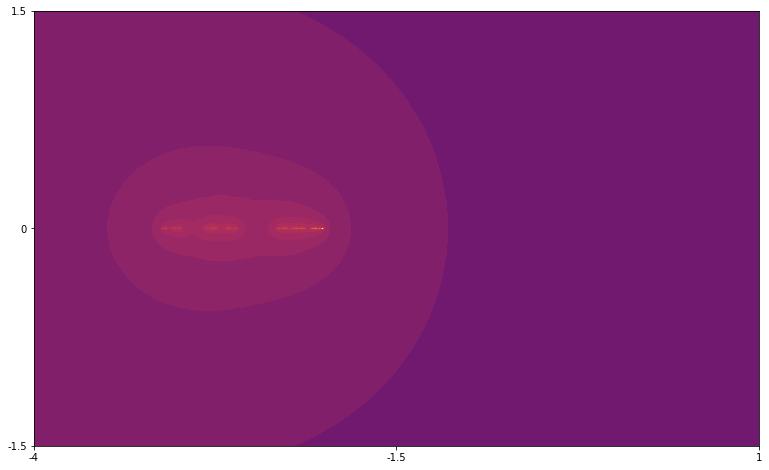

In [4]:
# Generate the colors and time how long that takes
t = time()
counts = generate_critical_counts(-4-1.5j,1+1.5j, 150, 49, 1200)
time() - t
ydim,xdim = counts.shape[:2]
# fig = plt.figure(figsize=(xdim/80,ydim/80), dpi=80)

plt.imshow(counts**0.3, zorder=1, cmap="inferno")

# ax = plt.Axes(fig, [0., 0., 1., 1.])

ax = plt.gca()
#ax.set_axis_off()
#fig.add_axes(ax)
ax.set_xlim(0,xdim)
ax.set_ylim(0,ydim)
ax.set_yticks([0,ydim/2,ydim])
ax.set_yticklabels([-1.5,0,1.5])
ax.set_xticks([0,xdim/2,xdim])
supress = ax.set_xticklabels([-4, -3/2, 1])

fig = plt.gcf()
fig.set_size_inches(16,8)

plt.savefig('Ma.png',  bbox_inches='tight')

In [6]:
def f(z): return z**2 - 3
z = 1
for i in range(20):
    z = f(z)
    print(z)

-2
1
-2
1
-2
1
-2
1
-2
1
-2
1
-2
1
-2
1
-2
1
-2
1
